## Data-driven optimization and decision making - Assignment 1
Juha Reinikainen


In [16]:
from desdeo_problem.testproblems.TestProblems import test_problem_builder
from desdeo_emo.EAs.RVEA import RVEA
from desdeo_emo.EAs.NSGAIII import NSGAIII
from desdeo_tools.utilities.quality_indicator import hypervolume_indicator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterGrid

Based on the Coello's book, DTLZ5 has degenerate pareto front and DTLZ7 has disconnected parete front.

In [17]:
#get all 8 combinations of parameters
param_grid = ParameterGrid({
    "objectives": [2, 5],
    "algorithm": [NSGAIII, RVEA],
    "problem": ["DTLZ5", "DTLZ7"],
})

In [18]:
# run the algorithms for different problems and numbers of objectives
# and store the results
# population size is set to 50 for all cases 
results = []
for params in param_grid:    
    print(params)
    k = params["objectives"]
    problem = \
        test_problem_builder(params["problem"], n_of_objectives=k, n_of_variables=10)
    optimizer = params["algorithm"](problem, 50, n_iterations=1000, n_gen_per_iter=100)
    while optimizer.continue_evolution():
        optimizer.iterate()
    population, aprx_pf = optimizer.end()
    results.append((params, population, aprx_pf))
    

{'algorithm': <class 'desdeo_emo.EAs.NSGAIII.NSGAIII'>, 'objectives': 2, 'problem': 'DTLZ5'}
{'algorithm': <class 'desdeo_emo.EAs.NSGAIII.NSGAIII'>, 'objectives': 2, 'problem': 'DTLZ7'}
{'algorithm': <class 'desdeo_emo.EAs.NSGAIII.NSGAIII'>, 'objectives': 5, 'problem': 'DTLZ5'}
{'algorithm': <class 'desdeo_emo.EAs.NSGAIII.NSGAIII'>, 'objectives': 5, 'problem': 'DTLZ7'}
{'algorithm': <class 'desdeo_emo.EAs.RVEA.RVEA'>, 'objectives': 2, 'problem': 'DTLZ5'}


c:\Users\Juha Reinikainen\Documents\dataopt\env\lib\site-packages\desdeo_emo\selection\APD_Select_constraints.py:82: UserWarning:

RVEA.py line 60 cosine larger than 1 decreased to 1

c:\Users\Juha Reinikainen\Documents\dataopt\env\lib\site-packages\desdeo_emo\selection\APD_Select_constraints.py:82: UserWarning:

RVEA.py line 60 cosine larger than 1 decreased to 1

c:\Users\Juha Reinikainen\Documents\dataopt\env\lib\site-packages\desdeo_emo\selection\APD_Select_constraints.py:82: UserWarning:

RVEA.py line 60 cosine larger than 1 decreased to 1

c:\Users\Juha Reinikainen\Documents\dataopt\env\lib\site-packages\desdeo_emo\selection\APD_Select_constraints.py:82: UserWarning:

RVEA.py line 60 cosine larger than 1 decreased to 1

c:\Users\Juha Reinikainen\Documents\dataopt\env\lib\site-packages\desdeo_emo\selection\APD_Select_constraints.py:82: UserWarning:

RVEA.py line 60 cosine larger than 1 decreased to 1

c:\Users\Juha Reinikainen\Documents\dataopt\env\lib\site-packages\desdeo_emo\sel

{'algorithm': <class 'desdeo_emo.EAs.RVEA.RVEA'>, 'objectives': 2, 'problem': 'DTLZ7'}


c:\Users\Juha Reinikainen\Documents\dataopt\env\lib\site-packages\desdeo_emo\selection\APD_Select_constraints.py:82: UserWarning:

RVEA.py line 60 cosine larger than 1 decreased to 1

c:\Users\Juha Reinikainen\Documents\dataopt\env\lib\site-packages\desdeo_emo\selection\APD_Select_constraints.py:82: UserWarning:

RVEA.py line 60 cosine larger than 1 decreased to 1

c:\Users\Juha Reinikainen\Documents\dataopt\env\lib\site-packages\desdeo_emo\selection\APD_Select_constraints.py:82: UserWarning:

RVEA.py line 60 cosine larger than 1 decreased to 1

c:\Users\Juha Reinikainen\Documents\dataopt\env\lib\site-packages\desdeo_emo\selection\APD_Select_constraints.py:82: UserWarning:

RVEA.py line 60 cosine larger than 1 decreased to 1

c:\Users\Juha Reinikainen\Documents\dataopt\env\lib\site-packages\desdeo_emo\selection\APD_Select_constraints.py:82: UserWarning:

RVEA.py line 60 cosine larger than 1 decreased to 1

c:\Users\Juha Reinikainen\Documents\dataopt\env\lib\site-packages\desdeo_emo\sel

{'algorithm': <class 'desdeo_emo.EAs.RVEA.RVEA'>, 'objectives': 5, 'problem': 'DTLZ5'}
{'algorithm': <class 'desdeo_emo.EAs.RVEA.RVEA'>, 'objectives': 5, 'problem': 'DTLZ7'}


In [19]:
# compute and print the hypervolume indicator values
# use the same reference point for both algorithms with same problem 
# and number of objectives
for nsga3_results, rvea_results in zip(results[0:], results[4:]):
    nadir = np.max(nsga3_results[2], axis=0)
    hv_nsga3 = hypervolume_indicator(nsga3_results[2], nadir)
    hv_rvea = hypervolume_indicator(rvea_results[2], nadir)
    print(nsga3_results[0], hv_nsga3)
    print(rvea_results[0], hv_rvea)

{'algorithm': <class 'desdeo_emo.EAs.NSGAIII.NSGAIII'>, 'objectives': 2, 'problem': 'DTLZ5'} 0.20564413584351862
{'algorithm': <class 'desdeo_emo.EAs.RVEA.RVEA'>, 'objectives': 2, 'problem': 'DTLZ5'} 0.20564359349995162
{'algorithm': <class 'desdeo_emo.EAs.NSGAIII.NSGAIII'>, 'objectives': 2, 'problem': 'DTLZ7'} 0.4816543901879927
{'algorithm': <class 'desdeo_emo.EAs.RVEA.RVEA'>, 'objectives': 2, 'problem': 'DTLZ7'} 0.4809329338348785
{'algorithm': <class 'desdeo_emo.EAs.NSGAIII.NSGAIII'>, 'objectives': 5, 'problem': 'DTLZ5'} 1.0140620390440762
{'algorithm': <class 'desdeo_emo.EAs.RVEA.RVEA'>, 'objectives': 5, 'problem': 'DTLZ5'} 1.0657072542918773
{'algorithm': <class 'desdeo_emo.EAs.NSGAIII.NSGAIII'>, 'objectives': 5, 'problem': 'DTLZ7'} 1.368200175646722
{'algorithm': <class 'desdeo_emo.EAs.RVEA.RVEA'>, 'objectives': 5, 'problem': 'DTLZ7'} 1.3732253243226613


| problem | objectives | decision variables | hypervolume | |
| ---- | ---- | ---- | -- | -- | 
|      |      |      | NSGA-III | RVEA |
|DTLZ5 | 2 | 10 | 0.20564413584351862 | 0.20564359349995162 |
|DTLZ5 | 5 | 10 | 1.0140620390440762 | 1.0657072542918773 |
|DTLZ7 | 2 | 10 | 0.4816543901879927 | 0.4809329338348785 |
|DTLZ7 | 5 | 10 | 1.368200175646722 | 1.3732253243226613 |

There is no big difference in hypervolume values of the algorithms. RVEA performs a little better on DTLZ5 with 5 objectives.

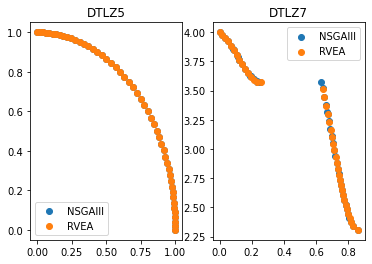

In [20]:
# plotting
fig, axs = plt.subplots(1,2)
#dtlz5 2 objectives pareto fronts of both algorithms
axs[0].scatter(results[0][2][:,0], results[0][2][:,1], label="NSGAIII")
axs[0].scatter(results[4][2][:,0], results[4][2][:,1], label="RVEA")
axs[0].set_title("DTLZ5")

#dtlz7 2 objectives pareto fronts of both algorithms
axs[1].scatter(results[1][2][:,0], results[1][2][:,1], label="NSGAIII")
axs[1].scatter(results[5][2][:,0], results[5][2][:,1], label="RVEA")
axs[1].set_title("DTLZ7")

axs[0].legend()
axs[1].legend()
plt.show()
# plt.scatter(aprx_pf[:,0], aprx_pf[:,1])
# plt.show()

Both algorithms find pretty much the same front and find diverse set of points. The front seems to be correct by just comparing the shape of the front to the three dimensional versions in the Coello's book.